In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


Matplotlib is building the font cache; this may take a moment.


In [5]:
# Load datasets
home_price = pd.read_csv('/Users/test/Downloads/home_price_data/CSUSHPISA.csv', parse_dates=['DATE'], index_col='DATE')
mortgage_rate = pd.read_csv('/Users/test/Downloads/home_price_data/MORTGAGE30US.csv', parse_dates=['DATE'], index_col='DATE')
unemployment = pd.read_csv('/Users/test/Downloads/home_price_data/UNRATE.csv', parse_dates=['DATE'], index_col='DATE')
gdp = pd.read_csv('/Users/test/Downloads/home_price_data/GDP.csv', parse_dates=['DATE'], index_col='DATE')
cpi = pd.read_csv('/Users/test/Downloads/home_price_data/CPIAUCSL.csv', parse_dates=['DATE'], index_col='DATE')
permits = pd.read_csv('/Users/test/Downloads/home_price_data/PERMIT.csv', parse_dates=['DATE'], index_col='DATE')
population = pd.read_csv('/Users/test/Downloads/home_price_data/POP.csv', parse_dates=['DATE'], index_col='DATE')


In [6]:
# Resample all data to quarterly to match GDP
data = pd.DataFrame(index=home_price.index)
data['HomePrice'] = home_price['CSUSHPISA']
data = data.join([
    mortgage_rate.resample('Q').mean(),
    unemployment.resample('Q').mean(),
    gdp.resample('Q').first(),
    cpi.resample('Q').mean(),
    permits.resample('Q').sum(),
    population.resample('Q').first()
])

# Rename columns for clarity
data.columns = ['HomePrice', 'MortgageRate', 'Unemployment', 'GDP', 'CPI', 'Permits', 'Population']

# Drop missing values
data.dropna(inplace=True)


/var/folders/vm/q8p69sns3jb4tpl6rdk0qbjc0000gn/T/ipykernel_15024/559870424.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  mortgage_rate.resample('Q').mean(),
/var/folders/vm/q8p69sns3jb4tpl6rdk0qbjc0000gn/T/ipykernel_15024/559870424.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  unemployment.resample('Q').mean(),
/var/folders/vm/q8p69sns3jb4tpl6rdk0qbjc0000gn/T/ipykernel_15024/559870424.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  gdp.resample('Q').first(),
/var/folders/vm/q8p69sns3jb4tpl6rdk0qbjc0000gn/T/ipykernel_15024/559870424.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cpi.resample('Q').mean(),
/var/folders/vm/q8p69sns3jb4tpl6rdk0qbjc0000gn/T/ipykernel_15024/559870424.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future ve

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


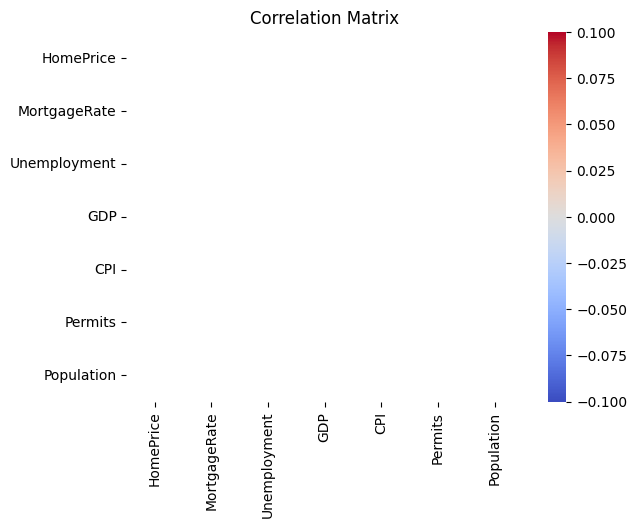

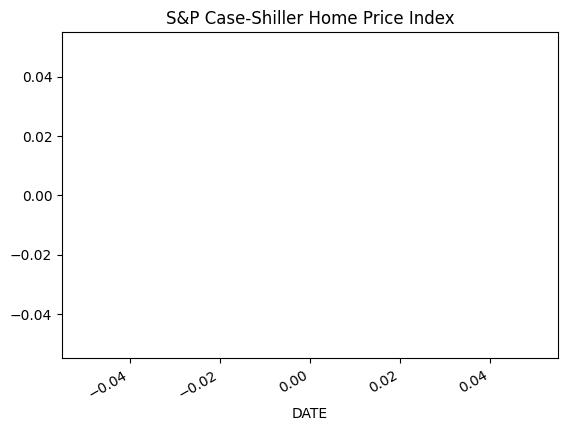

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Line plot of Home Prices
data['HomePrice'].plot(title="S&P Case-Shiller Home Price Index")
plt.show()


In [14]:
# Load dataset
data = pd.read_csv("/Users/test/Downloads/merged_home_price_data.csv")  # update path as needed

# Check if dataset is empty
if data.empty:
    raise ValueError("Dataset is empty. Please check your data loading or merging steps.")

# Drop rows with missing values
data.dropna(inplace=True)

# Make sure 'HomePrice' exists
if 'HomePrice' not in data.columns:
    raise ValueError("'HomePrice' column not found in dataset.")

# Features and target
X = data.drop(columns=['HomePrice', 'DATE'], errors='ignore')  # Drop DATE if present
y = data['HomePrice']

# Final sanity check
if len(X) == 0:
    raise ValueError("No rows left in dataset after dropping missing values.")

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")

# Model evaluations
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Lasso Regression", y_test, lasso_pred)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 8


In [8]:
# Features and target
X = data.drop('HomePrice', axis=1)
y = data['HomePrice']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [9]:
# Evaluation function
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} - R²: {r2_score(y_true, y_pred):.4f}, RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")

evaluate(y_test, lr_pred, "Linear Regression")
evaluate(y_test, rf_pred, "Random Forest")
evaluate(y_test, lasso_pred, "Lasso Regression")

# Plot actual vs predicted
plt.plot(y_test.values, label='Actual')
plt.plot(rf_pred, label='Predicted - RF')
plt.legend()
plt.title("Actual vs Predicted Home Prices")
plt.show()


NameError: name 'y_test' is not defined

In [10]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()


NameError: name 'rf' is not defined